# Movielens Case Study-project

### importing numpy and pandas package for data manipulation and analysis 

In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
%matplotlib inline

In [2]:
movies_df = pd.read_csv('movies.dat',sep='::',names=['MovieID','Title','Genres'],engine='python',header=None)

In [3]:
users_df  = pd.read_csv('users.dat',sep='::',names=['UserID','Gender','Age', 'Occupation', 'zip-code'],engine='python',header=None)

In [4]:
ratings_df = pd.read_csv('ratings.dat',sep='::',names=['UserID','MovieID','Rating', 'Timestamp'],parse_dates=['Timestamp'],engine='python',header=None)

In [5]:
movies_df.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [6]:
users_df.head()

,UserID,Gender,Age,Occupation,zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [7]:
ratings_df.head()

,UserID,MovieID,Rating,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [8]:
movies_df.isnull().sum()

MovieID    0
Title      0
Genres     0
dtype: int64

In [9]:
users_df.isnull().sum()

UserID        0
Gender        0
Age           0
Occupation    0
zip-code      0
dtype: int64

In [10]:
ratings_df.isnull().sum()

UserID       0
MovieID      0
Rating       0
Timestamp    0
dtype: int64

creating new dataset [Master_Data] with the following columns MovieID Title␣
UserID Age Gender Occupation Rating.
(i) Merge two tables at a time.
ii) Merge the tables using two primary keys MovieID & UserId)

### merging two data sets on MovieID primary key


In [11]:
Master_Data=pd.merge(movies_df,ratings_df,on='MovieID')

In [12]:
Master_Data.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


### merging two data sets on UserID primary key

In [13]:
Master_Data_user=pd.merge(Master_Data,users_df,on='UserID')

In [14]:
Master_Data_user.head()

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,zip-code
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268,F,1,10,48067
1,48,Pocahontas (1995),Animation|Children's|Musical|Romance,1,5,978824351,F,1,10,48067
2,150,Apollo 13 (1995),Drama,1,5,978301777,F,1,10,48067
3,260,Star Wars: Episode IV - A New Hope (1977),Action|Adventure|Fantasy|Sci-Fi,1,4,978300760,F,1,10,48067
4,527,Schindler's List (1993),Drama|War,1,5,978824195,F,1,10,48067


### Droping column Zip-code and TImestamp so that we can able to see the result ofmaster data with columns MovieID Title UserID Age Gender Occupation Rating

In [15]:
master_data=Master_Data_user.drop(['Genres','Timestamp','zip-code'],axis=1)

In [16]:
master_data.head()

,MovieID,Title,UserID,Rating,Gender,Age,Occupation
0,1,Toy Story (1995),1,5,F,1,10
1,48,Pocahontas (1995),1,5,F,1,10
2,150,Apollo 13 (1995),1,5,F,1,10
3,260,Star Wars: Episode IV - A New Hope (1977),1,4,F,1,10
4,527,Schindler's List (1993),1,5,F,1,10


### Explore the datasets using visual representations

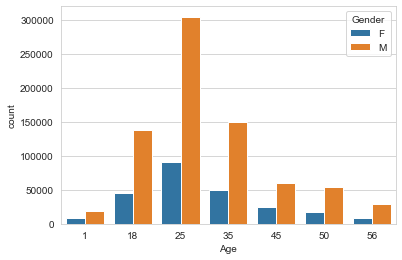

In [17]:
sns.set_style('whitegrid')
sns.countplot(x='Age',hue='Gender',data=master_data)

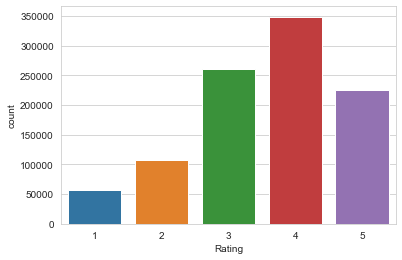

In [18]:
sns.set_style('whitegrid')
sns.countplot(x='Rating',data=master_data)

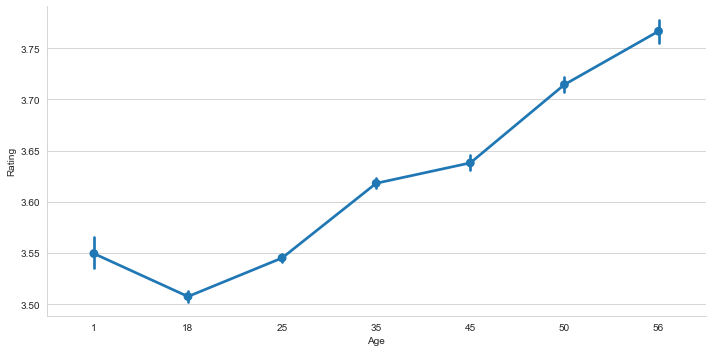

In [19]:
sns.catplot(y='Rating',x='Age',data=master_data,kind='point',aspect=2)

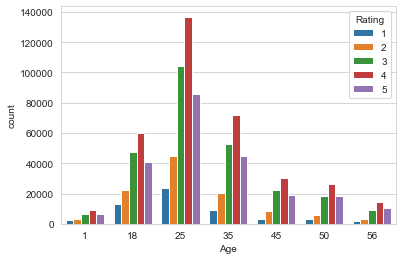

In [20]:
sns.set_style('whitegrid')
sns.countplot(x='Age',hue='Rating',data=master_data)

### User rating of the movie “Toy Story”


Text(0, 0.5, 'Number of Users')

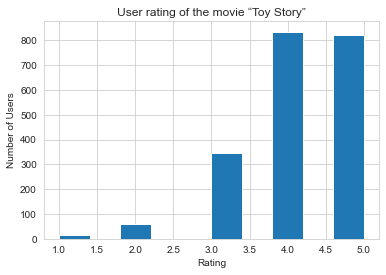

In [21]:
Toy_story_rating = master_data.groupby('Title')
toy_story = Toy_story_rating.get_group('Toy Story (1995)')
toy_story['Rating'].hist()
plt.title('User rating of the movie “Toy Story”') #title of the histogram
plt.xlabel('Rating') #x axis label
plt.ylabel('Number of Users') 

### Top 25 movies by viewership rating(normal format)


In [22]:
Top_25= master_data.groupby('Title').size().sort_values(ascending=False)[:25]
Top_25

Title
American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Saving Private Ryan (1998)                               2653
Terminator 2: Judgment Day (1991)                        2649
Matrix, The (1999)                                       2590
Back to the Future (1985)                                2583
Silence of the Lambs, The (1991)                         2578
Men in Black (1997)                                      2538
Raiders of the Lost Ark (1981)                           2514
Fargo (1996)                                             2513
Sixth Sense, The (1999)                                  2459
Braveheart (1995)                                        2443
Shakespeare in Love (1998)                               2369
Pr

### User_id =2696 ratings for all the movies


In [23]:
user_2696=Master_Data_user[Master_Data_user['UserID']==2696]
user_2696

,MovieID,Title,Genres,UserID,Rating,Timestamp,Gender,Age,Occupation,zip-code
991035,350,"Client, The (1994)",Drama|Mystery|Thriller,2696,3,973308886,M,25,7,24210
991036,800,Lone Star (1996),Drama|Mystery,2696,5,973308842,M,25,7,24210
991037,1092,Basic Instinct (1992),Mystery|Thriller,2696,4,973308886,M,25,7,24210
991038,1097,E.T. the Extra-Terrestrial (1982),Children's|Drama|Fantasy|Sci-Fi,2696,3,973308690,M,25,7,24210
991039,1258,"Shining, The (1980)",Horror,2696,4,973308710,M,25,7,24210
991040,1270,Back to the Future (1985),Comedy|Sci-Fi,2696,2,973308676,M,25,7,24210
991041,1589,Cop Land (1997),Crime|Drama|Mystery,2696,3,973308865,M,25,7,24210
991042,1617,L.A. Confidential (1997),Crime|Film-Noir|Mystery|Thriller,2696,4,973308842,M,25,7,24210
991043,1625,"Game, The (1997)",Mystery|Thriller,2696,4,973308842,M,25,7,24210
991044,1644,I Know What You Did Last Summer (1997),Horror|Mystery|Thriller,2696,2,973308920,M,25,7,24210


In [24]:
Master_Data['Genres'].value_counts()

Comedy                       116883
Drama                        111423
Comedy|Romance                42712
Comedy|Drama                  42245
Drama|Romance                 29170
                              ...  
Drama|Romance|Western            29
Children's|Fantasy               27
Comedy|Film-Noir|Thriller         5
Film-Noir|Horror                  2
Fantasy                           1
Name: Genres, Length: 301, dtype: int64

### Finding out all movies with unique genres


In [25]:
Master_Data['Genres'].unique()

array(["Animation|Children's|Comedy", "Adventure|Children's|Fantasy",
       'Comedy|Romance', 'Comedy|Drama', 'Comedy',
       'Action|Crime|Thriller', "Adventure|Children's", 'Action',
       'Action|Adventure|Thriller', 'Comedy|Drama|Romance',
       'Comedy|Horror', "Animation|Children's", 'Drama',
       'Action|Adventure|Romance', 'Drama|Thriller', 'Drama|Romance',
       'Thriller', 'Action|Comedy|Drama', 'Crime|Drama|Thriller',
       'Drama|Sci-Fi', 'Romance', 'Adventure|Sci-Fi', 'Adventure|Romance',
       "Children's|Comedy|Drama", 'Documentary', 'Drama|War',
       'Action|Crime|Drama', 'Action|Adventure', 'Crime|Thriller',
       "Animation|Children's|Musical|Romance", "Children's|Comedy",
       'Drama|Mystery', 'Sci-Fi|Thriller',
       'Action|Comedy|Crime|Horror|Thriller', 'Drama|Musical',
       'Crime|Drama|Romance', 'Adventure|Drama', 'Action|Thriller',
       "Adventure|Children's|Comedy|Musical", 'Action|Drama|War',
       'Action|Adventure|Crime', 'Crime', 'Drama

### generate category with a one-hot encoding ( 1 and 0) whether or not the movie belongs to that genre

In [26]:
dummies= Master_Data['Genres'].str.get_dummies("|")
dummies.head()

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0


In [27]:
dummies.columns

Index(['Action', 'Adventure', 'Animation', 'Children's', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Fantasy', 'Film-Noir', 'Horror', 'Musical',
       'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western'],
      dtype='object')

In [28]:
Master_Data_user.corr()

,MovieID,UserID,Rating,Timestamp,Age,Occupation
MovieID,1.000000,-0.017739,-0.064042,0.041632,0.027575,0.008585
UserID,-0.017739,1.000000,0.012303,-0.490383,0.034688,-0.026698
Rating,-0.064042,0.012303,1.000000,-0.026770,0.056869,0.006753
Timestamp,0.041632,-0.490383,-0.026770,1.000000,-0.064562,0.015646
Age,0.027575,0.034688,0.056869,-0.064562,1.000000,0.078371
Occupation,0.008585,-0.026698,0.006753,0.015646,0.078371,1.000000


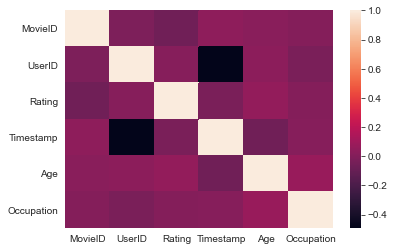

In [29]:
sns.heatmap(Master_Data_user.corr())

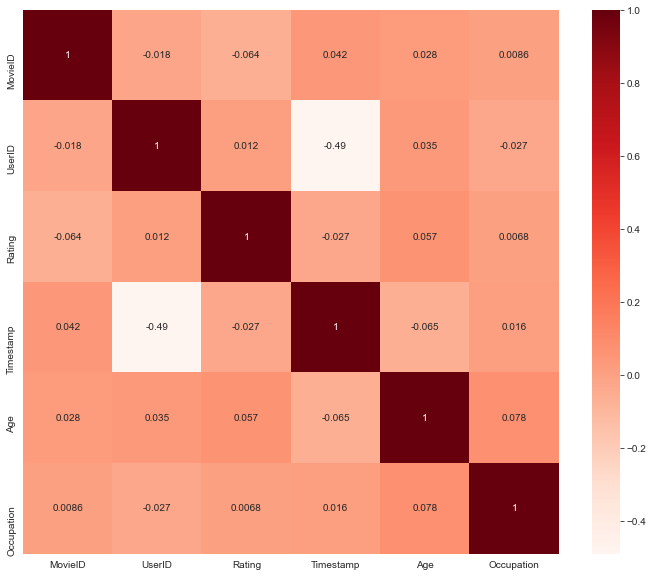

In [30]:
plt.figure(figsize=(12,10))
cor = Master_Data_user.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

### age and occupation are the features affecting the ratings

In [31]:
master_data[['Rating','Age','Occupation']].corr()

,Rating,Age,Occupation
Rating,1.000000,0.056869,0.006753
Age,0.056869,1.000000,0.078371
Occupation,0.006753,0.078371,1.000000


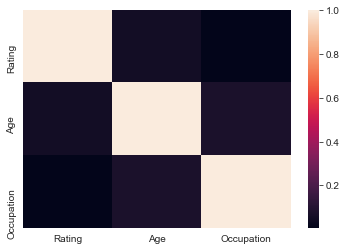

In [32]:
sns.heatmap(master_data[['Rating','Age','Occupation']].corr())

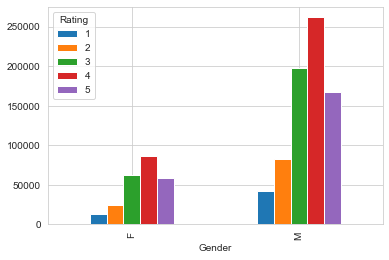

In [33]:
master_data.groupby(["Gender","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)

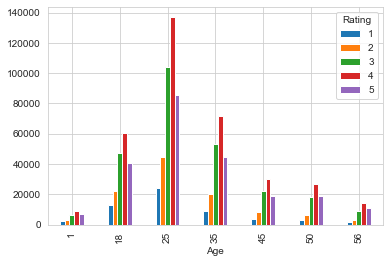

In [34]:
master_data.groupby(["Age","Rating"]).size().unstack().plot(kind='bar',stacked=False,legend=True)

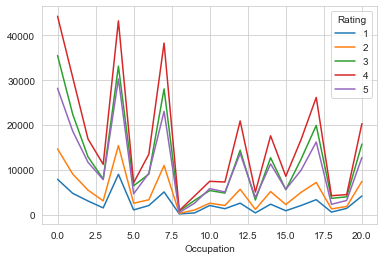

In [35]:
master_data.groupby(["Occupation","Rating"]).size().unstack().plot(kind='line',stacked=False,legend=True)

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LogisticRegression

In [37]:
features = master_data[['MovieID','Age','Occupation']].values

In [38]:
labels = master_data[['Rating']].values

In [39]:
labels

array([[5],
       [5],
       [5],
       ...,
       [5],
       [3],
       [5]], dtype=int64)

In [40]:
train, test, train_labels, test_labels =train_test_split(features,labels,test_size=0.80,train_size=0.20,random_state=0)
train

array([[2048,   45,   17],
       [1097,   25,   20],
       [1055,   45,    7],
       ...,
       [1198,   35,    1],
       [ 610,   25,    4],
       [3034,   56,    7]], dtype=int64)

In [41]:
test

array([[3526,   18,    4],
       [1022,   18,    4],
       [ 111,   18,   14],
       ...,
       [3019,   25,   11],
       [3552,   18,   12],
       [ 296,   35,   14]], dtype=int64)

In [42]:
train_labels


array([[3],
       [4],
       [2],
       ...,
       [5],
       [3],
       [3]], dtype=int64)

In [43]:
logreg = LogisticRegression()
logreg.fit(train, train_labels)
Y_pred = logreg.predict(test)
acc_log = round(logreg.score(train, train_labels) * 100, 2)
acc_log

E:\anaconda\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)
E:\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


34.74

In [44]:
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(train, train_labels)
Y_pred = knn.predict(test)
acc_knn = round(knn.score(train, train_labels) * 100, 2)
acc_knn


<ipython-input-44-cd6a807499b9>:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  knn.fit(train, train_labels)


52.57

#### as we can see K Nearest Neighbors Classifier is an appropriate model to predict the movie ratings
